<a href="https://colab.research.google.com/github/nathandhawale/Sales-Predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = '/content/sales_predictions.csv'
data_df = pd.read_csv(data)
data_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) The amount of rows and columns
2) Datatypes of each variable

In [2]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Checking for duplicates in data

In [3]:
data_df.duplicated().any()

False

In [4]:
data_df[data_df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


No duplicates found

4)Identify Missing Data

In [5]:
data_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) What to do with the missing data?
I think it would be beneficial to drop the columns that have this much missing data. First reason being that weight of on item will have no effect on someone purchasing it because no one looks at the weight and the second reason being is that there are too many missing values in the size of the outlet and it could throw off the entire dataset. If we were able to get the size of the outlets that would be benefeical but I do not think we would be able to get the size of 2410 outlets efficiently.

In [6]:
data_df.drop(columns = ['Item_Weight' ,'Outlet_Size'], inplace = True)

In [7]:
data_df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Inconsistent Values

In [8]:
data_df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [9]:
data_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
data_df.replace(['Low Fat', 'LF' , 'low fat'], ['Low Fat', 'Low Fat', 'Low Fat'], inplace = True)
data_df.replace(['Regular' , 'reg'], ['Regular', 'Regular'], inplace = True)
data_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
data_df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [12]:
data_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
data_df['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [14]:
data_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [15]:
data_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [16]:
data_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [17]:
data_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [18]:
data_df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

8) Numerical Columns

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [20]:
data_df['Item_Visibility'].mean()

0.06613202877895127

In [21]:
data_df['Item_Visibility'].max()

0.328390948

In [22]:
data_df['Item_Visibility'].min()

0.0

In [23]:
data_df['Item_MRP'].mean()

140.9927819781768

In [24]:
data_df['Item_MRP'].max()

266.8884

In [25]:
data_df['Item_MRP'].min()

31.29

In [26]:
data_df['Item_Outlet_Sales'].mean()

2181.2889135750365

In [27]:
data_df['Item_Outlet_Sales'].max()

13086.9648

In [28]:
data_df['Item_Outlet_Sales'].min()

33.29

In [29]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


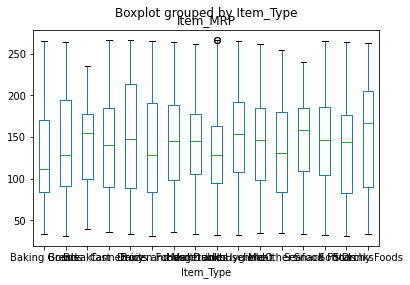

In [30]:
data_df.boxplot(by='Item_Type', column='Item_MRP', grid=False);

The boxplot above shows the Item price compared to the Item type to see if ther is relationship between the two

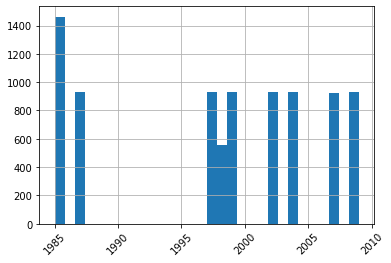

In [31]:
data_df['Outlet_Establishment_Year'].hist(bins = 30)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

This shows the establishment year of the outlets to see when they became popular and if new ones are increasing or decreasing

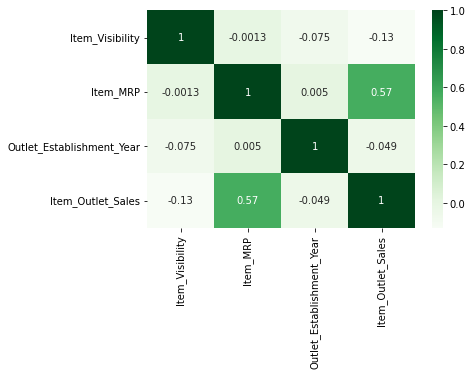

In [32]:
corr = data_df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

Text(0.5, 1.0, 'Distribuition of Visible Items')

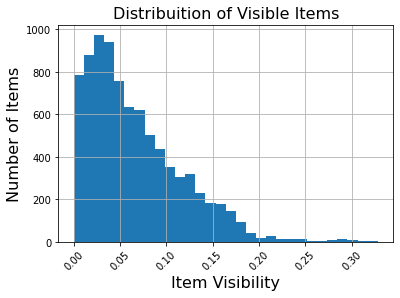

In [33]:
data_df["Item_Visibility"].hist(bins =30)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Item Visibility', fontsize = 16)
plt.ylabel('Number of Items', fontsize = 16)
plt.title('Distribuition of Visible Items', fontsize = 16)

In [34]:
data_df['Item_Outlet_Sales']=data_df['Item_Outlet_Sales'].astype(int)
data_df['Item_MRP']=data_df['Item_MRP'].astype(int)
data_df.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                       int64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales              int64
dtype: object

Text(0.5, 1.0, 'Distribuition of Price of Items')

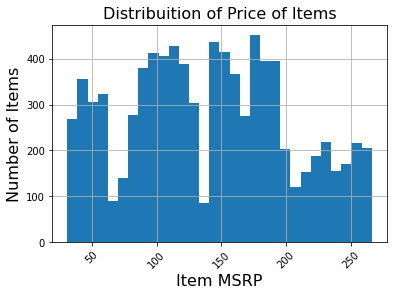

In [35]:
data_df["Item_MRP"].hist(bins =30)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Item MSRP', fontsize = 16)
plt.ylabel('Number of Items', fontsize = 16)
plt.title('Distribuition of Price of Items', fontsize = 16)

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [37]:
X = data_df.drop(columns = 'Item_Outlet_Sales')
y=data_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   int64  
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 666.0+ KB


In [39]:
data_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [40]:
data_df['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1},inplace = True)
data_df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
data_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [42]:
data_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [43]:
data_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [44]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [45]:
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [46]:
from sklearn import preprocessing
categorical_pipeline = make_pipeline(most_frequent_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [47]:
numeric_pipeline = make_pipeline(mean_imputer, scaler)
numeric_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [48]:
number_tuple = (numeric_pipeline, num_selector)
category_tuple = (categorical_pipeline, cat_selector)

In [49]:
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9f4370110>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9f4370150>

In [50]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9f4370110>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9f4370150>

In [51]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [52]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values \n')
X_train_processed

0 missing values 



array([[-0.71277507,  1.82864837,  1.32784893, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.59909046,  1.32784893, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24778821,  0.13618724, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52525097,  0.49368575, ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.39094318,  1.0895166 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.74224544, -0.10214509, ...,  1.        ,
         0.        ,  0.        ]])

In [53]:
X = data_df.drop(columns = 'Item_Outlet_Sales')
y=data_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
dummy = DummyRegressor(strategy = 'mean')
base_pipe = make_pipeline(preprocessor, dummy)
base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9f4370110>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [70]:
def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f} ')

In [73]:
print('Train Evaluation')

eval_model(y_train, base_pipe.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, base_pipe.predict(X_test))

Train Evaluation
MAE: 1,360.22 
 MSE: 2,959,443.26 
 RMSE: 1,720.30 
 R2: 0.00 

 Test Evaluation
MAE: 1,326.12 
 MSE: 2,772,149.22 
 RMSE: 1,664.98 
 R2: -0.00 


In [75]:
lin_reg = make_pipeline(preprocessor, LinearRegression())

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9f4370110>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [76]:
print('Train Evaluation')

eval_model(y_train, lin_reg.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, lin_reg.predict(X_test))

Train Evaluation
MAE: 736.52 
 MSE: 972,775.42 
 RMSE: 986.29 
 R2: 0.67 

 Test Evaluation
MAE: 3,911,306,223,322.02 
 MSE: 2,087,398,052,427,446,305,165,410,304.00 
 RMSE: 45,688,051,528,024.77 
 R2: -756,582,250,946,956,754,944.00 


In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
decision_tree = DecisionTreeRegressor(random_state = 42)

In [82]:
dec_tree = make_pipeline(preprocessor, decision_tree)

In [83]:
dec_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9f4370110>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [84]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [85]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.273280935915057


In [88]:
decision_tree.get_depth()

68

In [90]:
decision_tree.get_n_leaves()

6218

In [92]:
decision_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2 = make_pipeline(preprocessor, decision_tree_2)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.42943989846119657
0.4350329668835988


In [93]:
decision_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15 = make_pipeline(preprocessor, decision_tree_15)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

0.734307741695132
0.48576366893312173


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
max_depth_range = list(range(2, 68, 3)) 
r2 = []
for depth in max_depth_range:
    decision_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree = make_pipeline(preprocessor, decision_tree)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

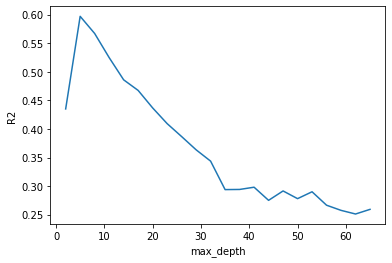

In [99]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [100]:
decision_tree_9 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
dec_tree_9 = make_pipeline(preprocessor, decision_tree_9)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)

0.6510837571345787
0.5532063815186317


In [101]:
max_depth_range = list(range(2, 10)) 
r2 = []
for depth in max_depth_range:
    decision_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree = make_pipeline(preprocessor, decision_tree)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

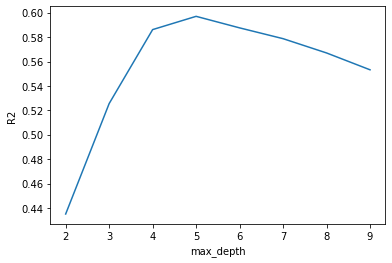

In [102]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [103]:
decision_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5 = make_pipeline(preprocessor, decision_tree_5)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6028892031082718
0.5970202843425606


In [105]:
print('Train Evaluation')

eval_model(y_train, dec_tree_5.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, dec_tree_5.predict(X_test))

Train Evaluation
MAE: 763.44 
 MSE: 1,175,226.87 
 RMSE: 1,084.08 
 R2: 0.60 

 Test Evaluation
MAE: 735.56 
 MSE: 1,111,814.44 
 RMSE: 1,054.43 
 R2: 0.60 


In order to find a relationship of how the price is affected by all the other various metrics, I did two different models. The first model was a simple linear regression model and the results did not seem accurate with the massive difference between the training and testing set. The second model that I used worked significantly better and much more efficient
The second model was a decision tree model, and after running a few variation with varying depths, I discovered that the most accurate depth was 7. Using the decision tree model with a depth of 7 brought the R2 and the MSE values close together indicating that it was an efficient model.